Brandon Mather DSC550-T301 - Final Project

Introduction:

In the current atmosphere, sports betting is on the rise. Everybody is looking for an edge into figuring out the best odds of winning including the people placing the bets, but also the companies. Through data we can try and figure out the best way to find out which teams are more likely to beat another to gain an edge. This analysis will be most useful to sports betting companies so that they know the best odds to put games at. I will be focusing on the NFL for this project, using data from the last three seasons, and will be proving that scoring is not the single thing that can make a team win, there are a lot of factors that go into a game. I will be using a logistic regression model to best determine which teams are most likely to win in a scenario. This will help sports betting companies get an even better edge on the bettor. I believe that this type of model would be useful in other leagues as well, but the statistics would have to change. The overall goal of the model will be to determine who would win in a head to head matchup based off wins in the last 3 seasons. All of the data has been collected from https://www.pro-football-reference.com/.

Data Preparation:

In [94]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
standings_2020 = pd.read_csv('NFL_standings20.csv')
standings_2021 = pd.read_csv('NFL_standings21.csv')
standings_2022 = pd.read_csv('NFL_standings22.csv')
stats_2020 = pd.read_csv('NFL_stats2020.csv')
stats_2021 = pd.read_csv('NFL_stats2021.csv')
stats_2022 = pd.read_csv('NFL_stats2022.csv')
defense_2020 = pd.read_csv('NFL_defense2020.csv')
defense_2021 = pd.read_csv('NFL_defense2021.csv')
defense_2022 = pd.read_csv('NFL_defense2022.csv')

In [3]:
to_drop_standings = ['W-L%', 'PF', 'PA', 'SoS', 'SRS', 'OSRS', 'DSRS']
to_drop_defense = ['Rk', 'G', 'Ply', 'Y/P', 'FL', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'NY/A', 'Y/A', '1stD', 
                   'Att','1stPy', 'TO%', 'EXP']
to_drop_stats = ['Rk', 'G', 'Ply', 'Y/P', 'FL', 'Cmp', 'PassAtt', 'PassYds', 'PassTD', 'Int', 'NY/A', 'Pass1stD', 'RushAtt',
                 'RushYds', 'RushTD', 'Y/A', 'Rush1stD', 'PenYds', '1stPy', 'TO%', 'EXP']

In [4]:
stats_2020.drop(to_drop_stats, inplace=True, axis=1)
stats_2021.drop(to_drop_stats, inplace=True, axis=1) 
stats_2022.drop(to_drop_stats, inplace=True, axis=1) 
defense_2020.drop(to_drop_defense, inplace=True, axis=1) 
defense_2021.drop(to_drop_defense, inplace=True, axis=1) 
defense_2022.drop(to_drop_defense, inplace=True, axis=1)
standings_2020.drop(to_drop_standings, inplace=True, axis=1) 
standings_2021.drop(to_drop_standings, inplace=True, axis=1) 
standings_2022.drop(to_drop_standings, inplace=True, axis=1)

In [5]:
to_drop_defense2 = ['1stD.1', 'Att.1', 'Yds.1', 'TD.1', '1stD.2', 'Yds.2']

In [6]:
defense_2020.drop(to_drop_defense2, inplace=True, axis=1) 
defense_2021.drop(to_drop_defense2, inplace=True, axis=1) 
defense_2022.drop(to_drop_defense2, inplace=True, axis=1)

In [7]:
stats_Merged_data = pd.concat([stats_2020, stats_2021]).groupby(['Tm']).sum().reset_index()

In [8]:
stats_Merged_data = pd.concat([stats_Merged_data, stats_2022]).groupby(['Tm']).sum().reset_index()

In [9]:
defense_Merged_data = pd.concat([defense_2020, defense_2021]).groupby(['Tm']).sum().reset_index()

In [10]:
defense_Merged_data = pd.concat([defense_Merged_data, defense_2022]).groupby(['Tm']).sum().reset_index()

In [11]:
standings_Merged_data = pd.concat([standings_2020, standings_2021]).groupby(['Tm']).sum().reset_index()

In [12]:
standings_Merged_data = pd.concat([standings_Merged_data, standings_2022]).groupby(['Tm']).sum().reset_index()

In [13]:
defense_Merged_data = defense_Merged_data.rename(columns = {'TO':'DeffenseTO'})

In [14]:
stats_Merged_data = stats_Merged_data.rename(columns = {'TO':'OffenseTO'})

In [15]:
final_merged_data = pd.merge(stats_Merged_data, defense_Merged_data, on='Tm')

In [16]:
final_merged_data = pd.merge(final_merged_data, standings_Merged_data, on='Tm')

In [17]:
final_merged_data.drop('Tm', inplace=True, axis=1)

In [18]:
final_merged_data

,PF,Ydsgained,OffenseTO,total1stD,OffPen,Sc%offense,PA,Ydsallowed,DeffenseTO,DefPen,Sc%against,W,L,T,PD,MoV
0,1199,18004,61,1074,345,117.0,1182,17159,68,298,114.4,23,27,0,17,1.2
1,1074,16476,65,1002,243,117.1,1259,18724,58,309,130.2,18,32,0,-185,-10.9
2,1205,18010,65,1058,288,122.7,1010,16967,62,254,100.0,29,21,0,195,12.1
3,1439,19197,71,1162,307,139.6,950,15383,83,277,98.4,37,12,0,489,29.9
4,1001,15879,71,938,306,104.8,1180,16915,55,298,117.8,17,33,0,-179,-10.8
5,1009,15760,76,946,274,104.7,1240,17293,57,272,120.2,17,33,0,-231,-13.6
6,1189,17029,63,1012,236,117.1,1122,17562,62,315,113.6,26,22,1,67,3.8
7,1118,17638,59,1047,314,107.4,1171,16662,60,270,118.9,26,24,0,-53,-3.2
8,1392,18902,69,1108,327,125.9,1173,17763,90,310,109.1,30,20,0,219,12.6
9,945,16514,74,939,277,98.5,1127,16871,58,316,113.2,17,33,0,-182,-11.1


Graphical Analysis:

In [19]:
wins = final_merged_data["W"]
offensive_scoring = final_merged_data["PF"]
defensive_scoring_allowed = final_merged_data["PA"]
offensive_yrds = final_merged_data["Ydsgained"]
defensive_yrds = final_merged_data["Ydsallowed"]

With this graphical analysis I want to compare the four statistics that I think will have the biggest impact on wins, these are Points Scored, Points Allowed, Yards Gained, and Yards allowed. 

Wins Vs Points Scored


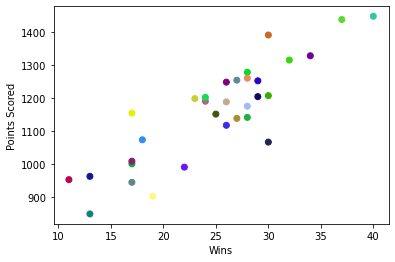

In [20]:
print("Wins Vs Points Scored")
plt.scatter(wins, offensive_scoring, c=np.random.rand(len(wins),3))

plt.xlabel("Wins")
plt.ylabel("Points Scored")
plt.show()

Wins Vs Points Allowed


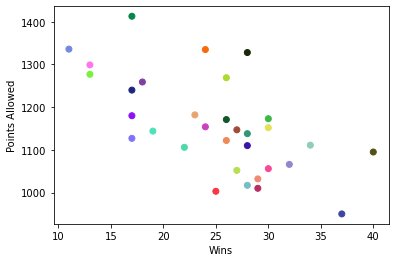

In [21]:
print("Wins Vs Points Allowed")
plt.scatter(wins, defensive_scoring_allowed, c=np.random.rand(len(wins),3))

plt.xlabel("Wins")
plt.ylabel("Points Allowed")
plt.show()

Wins Vs Yards Gained


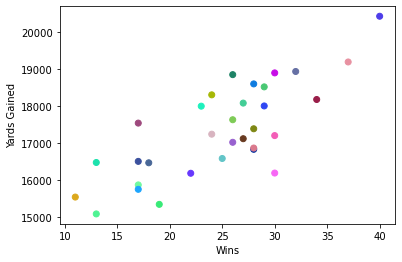

In [22]:
print("Wins Vs Yards Gained")
plt.scatter(wins, offensive_yrds, c=np.random.rand(len(wins),3))

plt.xlabel("Wins")
plt.ylabel("Yards Gained")
plt.show()

Wins Vs Yards Allowed


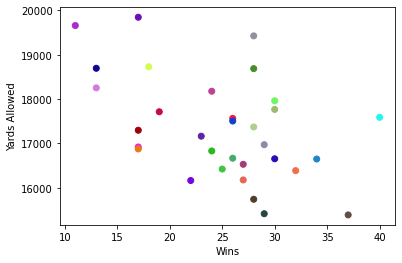

In [23]:
print("Wins Vs Yards Allowed")
plt.scatter(wins, defensive_yrds, c=np.random.rand(len(wins),3))

plt.xlabel("Wins")
plt.ylabel("Yards Allowed")
plt.show()

Model Building:

Here I will build a logistic regression model with the statistics. The target will be Wins and the test/train split will be 75% to 25%

In [24]:
Y = final_merged_data.W
X = final_merged_data.drop('W',axis=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [26]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [27]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Model Evaluation:

For the model evaluation I will be showing the accuracy of my model and finding which statistics had the most importance to the model as well. 

In [28]:
pipe.score(x_test, y_test)

0.375

In [89]:
feature_names = x_train.columns

In [90]:
coefs = pipe.named_steps["logisticregression"].coef_.flatten()

In [91]:
zipped = zip(feature_names, coefs)

In [92]:
df = pd.DataFrame(zipped, columns=["feature", "value"])

In [93]:
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Stat')

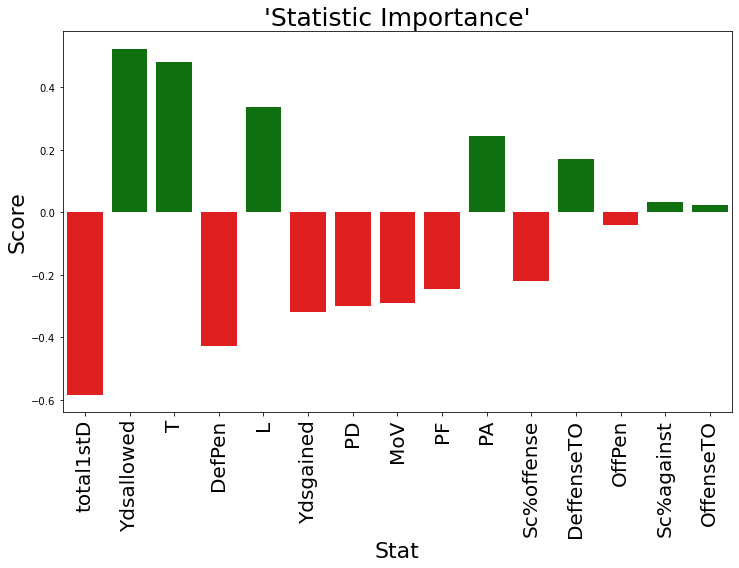

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df,
           palette=df["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("'Statistic Importance'", fontsize=25)
ax.set_ylabel("Score", fontsize=22)
ax.set_xlabel("Stat", fontsize=22)

Conclusion: 

My model is telling me that the most important statistics that effect wins is Losses, Ties (which makes sense since if it's not a win then it's on of those) Yards allowed, Points against, Defensive Turnovers, Scoring % against, and offensive turnovers. This can tell a football team that defense could potentially have a bigger impact on winning then offense, since most of the positive importance stats are on the defensive side of the ball. I believe this model is ready to be deployed but could use some imporovements beforehand to make sure things are relevant. I think taking out Losses and Ties and replacing them with two other statistics would make it better and tell a coach more. I think another additional opportunity that would improve this model is to use even more statistics, you could use a longer period of time so the model has more data to work with which could make it even more accurate and show more of a representation of the league. You could even break up the last 20 years into 5 year blocks to see if there is a trend in the way football is played. Maybe 20 years ago offense mattered but now it's trending towards defense, and continuing to make these models may allow a coach to see when offense becomes a bigger part of winning.  

In [ ]:
What does the analysis/model building tell you?
Is this model ready to be deployed?
What are your recommendations?
What are some of the potential challenges or additional opportunities that still need to be explored?